## Method 1 : Longest Distance USING bfs via CSV Traced Map:

### Import Libraries:

In [26]:
import networkx as nx
import matplotlib.pyplot as plt
import sys
import pandas as pd
from collections import defaultdict, deque


### Import Data:

In [2]:
df = pd.read_csv("../../data/boston_traced_map_norm.csv")
df[:5]

,s,d,w
0,0,1,11
1,1,2,12
2,2,3,11
3,0,4,14
4,3,0,10


### Create Graph and Populate

In [3]:
G = nx.Graph()

In [4]:
for row in df.values:
    G.add_edge(row[0],row[1], weight=row[2])

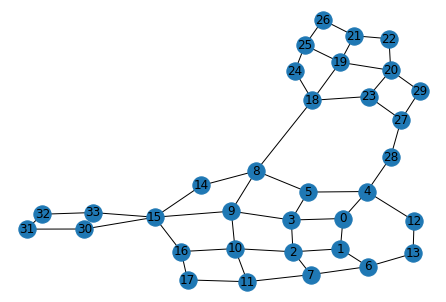

In [25]:
nx.draw(G, with_labels=True)
plt.show()

### Convert to Adjacenct List:

In [6]:
adj_list = nx.to_dict_of_lists(G)

### Create Boston Graph

In [7]:
Graph_Boston = []
for row in df.values:
    Graph_Boston.append((str(row[0]),str(row[1]), float(row[2])))
Graph_Boston

[('0', '1', 11.0),
 ('1', '2', 12.0),
 ('2', '3', 11.0),
 ('0', '4', 14.0),
 ('3', '0', 10.0),
 ('4', '5', 13.0),
 ('5', '3', 12.0),
 ('1', '6', 12.0),
 ('6', '7', 10.0),
 ('7', '2', 15.0),
 ('5', '8', 10.0),
 ('8', '9', 10.0),
 ('9', '3', 10.0),
 ('9', '10', 9.0),
 ('10', '2', 11.0),
 ('10', '11', 6.0),
 ('11', '7', 7.0),
 ('4', '12', 8.0),
 ('12', '13', 8.0),
 ('13', '6', 12.0),
 ('8', '14', 13.0),
 ('14', '15', 8.0),
 ('15', '9', 9.0),
 ('15', '16', 9.0),
 ('16', '10', 10.0),
 ('16', '17', 10.0),
 ('17', '11', 5.0),
 ('8', '18', 5.0),
 ('18', '19', 10.0),
 ('19', '20', 10.0),
 ('19', '21', 16.0),
 ('21', '22', 16.0),
 ('22', '20', 8.0),
 ('18', '23', 12.0),
 ('23', '20', 11.0),
 ('18', '24', 11.0),
 ('24', '25', 12.0),
 ('25', '19', 8.0),
 ('25', '26', 8.0),
 ('26', '21', 11.0),
 ('23', '27', 12.0),
 ('27', '28', 12.0),
 ('27', '29', 11.0),
 ('29', '20', 13.0),
 ('28', '4', 16.0),
 ('15', '30', 8.0),
 ('30', '31', 7.0),
 ('31', '32', 11.0),
 ('32', '33', 12.0),
 ('33', '15', 12.0)]

### Create and Test Longest Limited Distance Algorithm:

In [13]:
def boston_longest_limited_distance(graph, end_node, limit):
    """
    Function that uses Breadth-First Search (BFS) to find the longest limited route
    @input graph: The graph of the network
    @input end_node: Final node to end at
    @input limit: Maximum distance 
    
    Returns the total distance as well as the path to take
    """
    # Create a dictionary
    def_d = defaultdict(list)
    
    # Create a queue using deque
    queue = deque([('0', 0, [])])
    
    # Create the result variable to store the results
    result = {end_node:(0, [])}
    
    # Start for loop to iterate over the graph, store nodes and values
    for start, *args in graph:
        def_d[start].append(args)

    # Enter while loop based on queue
    while queue:
        start, args, c = queue.popleft()
        
        # If limit is reached
        if start == end_node and len(c) == limit:
            if result[start][0] < args:
                result[start] = (args, c)
                
        #  If limit is NOT yet reached
        if len(c+[start]) <= limit:
            for x, y in def_d[start]:
                queue.append((x, args+y, c+[start]))

    print(result[end_node])
    
boston_longest_limited_distance(Graph_Boston, '13', 22)

(257.0, ['0', '4', '5', '3', '0', '4', '5', '3', '0', '4', '5', '3', '0', '4', '5', '8', '18', '23', '27', '28', '4', '12'])


In [23]:
boston_longest_limited_distance(Graph_Boston, '1', 12)

(140.0, ['0', '4', '5', '8', '18', '23', '27', '28', '4', '5', '3', '0'])
